Here we take a very simple convolutional neural network and train it for 10 epochs, on the FashionMNIST dataset.

Hopefully this will be deterministic or the rest won't make sense!

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8
import gallery
gallery.srand(0)

m = gallery.mnist_cnn('fashion',1).train(10)

env: CUBLAS_WORKSPACE_CONFIG=:4096:8
Loading data...
Creating model...
Loaded model parameters from parameters/model_FashionMNIST_CNN1_10.json
Loaded up to epoch 10


Let's see what the convolutional layer activations are for the first 4 training images.

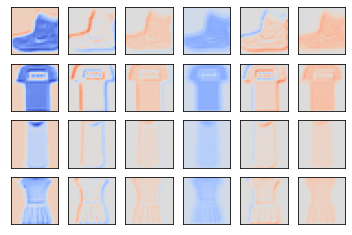

In [2]:
m.activate(4).show_activation_grid(0)

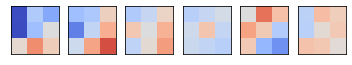

In [3]:
m.show_conv_parameters(0)

We already notice something strange - one of them is all negative (blue) which means that the ReLU layer will extinguish it.

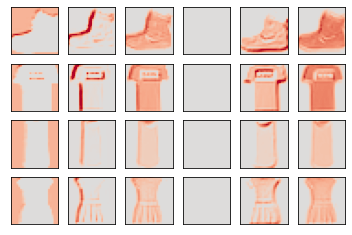

In [4]:
m.activate(4).show_activation_grid(1)

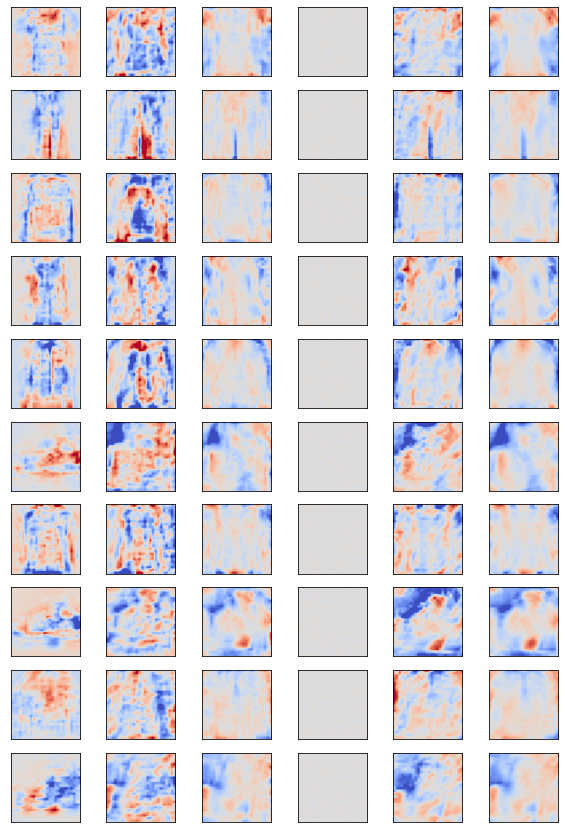

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,15)
m.show_dense_parameters(3, reshape_in=(6,26,26), transpose=True)

In [6]:
m.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

You can see there's a lot of correlation between columns 2, 4 and 5 in parameter space. This suggests we should "rotate" our view and look at principal components instead.